data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('spam.tsv', sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


from matplotlib import pyplot as plt
_df_0['length'].plot(kind='hist', bins=20, title='length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['punct'].plot(kind='hist', bins=20, title='punct')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='length', y='punct', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['length'].plot(kind='line', figsize=(8, 4), title='length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['punct'].plot(kind='line', figsize=(8, 4), title='punct')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
df['label'].value_counts()/len(df)


label
ham     0.865937
spam    0.134063
Name: count, dtype: float64

so here data is not balanced ie not equal number of ham and spam present , solution is we drop/discard randomly some data from this ham category and equivalently whatever numbers of messages are available in a spam category the same amount of message we can put into ham category, so we can have dataset 50% of ham and 50 of spam

In [9]:
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']

In [10]:
ham.shape, spam.shape

((4825, 4), (747, 4))

so as ham is more so to make 50-50 its easy to make both data set length of 747

In [15]:
ham = (ham.sample(spam.shape[0]))
ham.shape, spam.shape

((747, 4), (747, 4))

In [17]:
data = pd.concat([ham, spam], ignore_index=True)

thisis cuz we append all those spam messages into ham message or ham into spam , ignore index is because both of these have same index , so it shld not create problem while appending because there shld not be two record which has exactly same index , so assign it to a new variable like data

---



In [18]:
data.shape

(1494, 4)

In [19]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

now they are same . some quick visualization now


In [20]:
data.head()

,label,message,length,punct
0,ham,Normally i use to drink more water daily:),42,2
1,ham,Gudnite....tc...practice going on,33,7
2,ham,"U so lousy, run already come back then half de...",58,7
3,ham,Hi Harish's rent has been transfred to ur Acnt.,47,2
4,ham,Shall i ask one thing if you dont mistake me.,45,1


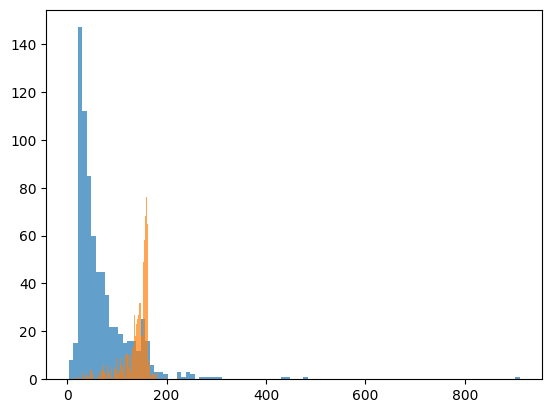

In [24]:
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7)

plt.show( )

info retrieved is that if the legth of the message is more then there is more chances of it begin a spam

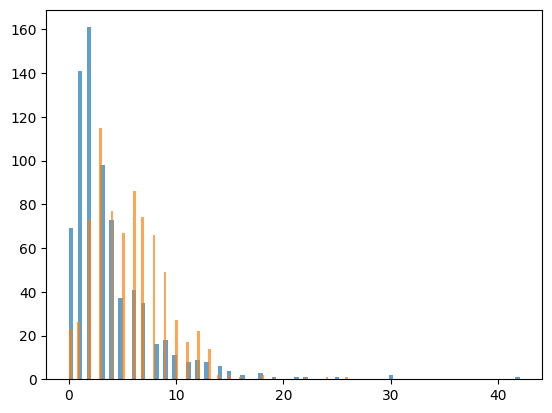

In [25]:
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7)
plt.show()

In [26]:
data

,label,message,length,punct
0,ham,Normally i use to drink more water daily:),42,2
1,ham,Gudnite....tc...practice going on,33,7
2,ham,"U so lousy, run already come back then half de...",58,7
3,ham,Hi Harish's rent has been transfred to ur Acnt.,47,2
4,ham,Shall i ask one thing if you dont mistake me.,45,1
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


now split data for training and testing

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test, y_train,y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=0, shuffle=True)

the feature vector we use is the message, so tht will be our input data n our objective is to predict the label which is the output data ,test size is 0.3 ie 30 % of the data for test. Set random_state (integer): Ensures the same shuffling and split every time you run the code with that value. This is useful for:
Reproducibility: Get the same training and testing sets for debugging, sharing code, or consistent comparisons.
Debugging: Isolate issues by rerunning with the same split.
Fair Comparisons: Evaluate models on the same data distribution.

so x refers to feature input and y refers to the label as an output

In [30]:
X_train.shape, X_test.shape

((1045,), (449,))

**building the model (RANDOM FOREST)**


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

 we are dealing with the just text data only, and we just cannot throw alLthose textual data directly on a machine learning algorithm. We have to convert some sort of encoding which will convert all those textual data into some sort of numbers. Now, to do that, there are a number of methods are available, like a bag of words model or say Tf-idf model, and some of the deep learning based advanced models like a word two Vec or a globaLvectors.
So all those techniques eventually try to convert all those textual data into kinds of number which will try to preserve all those semantic relationship exists between the data.
The deep learning based model obviously works much better with accuracy, but we'll go with the one encoding technique which will convert all your text data into kind of tf-idf vector that is nothing but a term frequency and inverse document frequency. So multiplication of both of these will give you some number and gives you some score the presence of
some particular word in a document. random forest is a pipeline process so import that also


In [36]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', RandomForestClassifier(n_estimators=10))])

Now, instead of creating this two object, we will create a pipeline object.
And inside the pipeline object, we will just pass both of these objects tfIDF vectorizer and a random forest classifier. So make a pipeline object. And here pass it as a list. This two objects tfidfvectorizer object and a random forest classifier object so we pass both of them as like tuples.
this random forest classifier contains a lot of hyper parameter.
so just make some hyper parameters like  n_estimator.

In [37]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

 just fit our input training data because once the object is created, you need to train it.
And for training there is a uniform set of APIs are available in this Sklearn library, so that will be a fit function.
So here pass X train and Y train.

**predicting results**


In [38]:
y_pred = classifier.predict(X_test)

In [39]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', '

In [40]:
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

now we have output so we have to compare this analytically n there is one definite methods to get the accuracy begind classification problem ie the confusion matrix

In [41]:
accuracy_score(y_test, y_pred)

0.9064587973273942

In [42]:
confusion_matrix(y_test, y_pred)

array([[222,   5],
       [ 37, 185]])

In [43]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         ham       0.86      0.98      0.91       227\n        spam       0.97      0.83      0.90       222\n\n    accuracy                           0.91       449\n   macro avg       0.92      0.91      0.91       449\nweighted avg       0.91      0.91      0.91       449\n'

**building a model ( support vector machine )**

In [48]:
from sklearn.svm import SVC

In [52]:
svm = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', SVC(C=100, gamma='auto'))])

In [53]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [55]:
y_pred = svm.predict(X_test)


In [56]:
accuracy_score(y_test, y_pred)

0.9576837416481069

In [57]:
confusion_matrix(y_test, y_pred)

array([[225,   2],
       [ 17, 205]])

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       227
        spam       0.99      0.92      0.96       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [63]:
# to test both with a new data
test1 = [" hello, how are you doing today?"]
test2 = ["you are learning nlp"]
test3 = [ " congratulations, you won a lottery ticket worth 1 million dollars. To claim call 909809809 "]

In [64]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [65]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
